# 第一次尝试写回测分析

# 参考

[QUANTAXIS回测分析全过程讲解.md](https://github.com/QUANTAXIS/QUANTAXIS/blob/master/Documents/QUANTAXIS%E5%9B%9E%E6%B5%8B%E5%88%86%E6%9E%90%E5%85%A8%E8%BF%87%E7%A8%8B%E8%AE%B2%E8%A7%A3.md)

[简单策略回测详解](https://doc.yutiansut.com/quantaxis-hui-ce-fen-xi-quan-guo-cheng-jiang-jie)

In [2]:
import QUANTAXIS as QA
try:
    assert QA.__version__>='1.1.0'
except AssertionError:
    print('pip install QUANTAXIS >= 1.1.0 请升级QUANTAXIS后再运行此示例')

## STEP1 初始化账户,初始化回测broker

In [3]:
Account = QA.QA_Account(user_cookie='ivan_user_cookie', portfolio_cookie='ivan_portfolio_cookie')
Broker = QA.QA_BacktestBroker()

In [4]:
import warnings

In [5]:
# 重设账户初始资金
Account.reset_assets(200000)
Account.account_cookie='JCSC_EXAMPLE'

In [6]:
Account.init_assets

{'cash': 200000, 'hold': {}}

## SETP2:引入回测的市场数据

In [11]:
# 1. QA.QA_fetch_stock_list_adv().code.tolist() # 获取全市场的股票代码
# 2. QA.QA_fetch_stock_block_adv().get_block('云计算').code  # 按版块选取
# 3. code= ['000001','000002'] # 自己指定
codelist = QA.QA_fetch_stock_list_adv().code.tolist()

In [13]:
data = QA.QA_fetch_stock_day_adv(codelist,'2017-09-01','2018-05-20')

In [14]:
data=data.to_qfq()

In [15]:
data.data

open        high         low       close  \
date       code                                                     
2017-09-01 000001   10.985375   11.092502   10.858771   10.917203   
           000002   21.522524   21.624307   21.041367   21.170909   
           000004   23.160000   23.260000   22.960000   23.080000   
           000005    4.890000    4.890000    4.850000    4.870000   
           000006    7.952528    7.961895    7.868225    7.886959   
           000007   15.620000   15.840000   15.440000   15.500000   
           000008    7.919283    7.939032    7.850162    7.879785   
           000009    7.071846    7.171100    7.038761    7.104931   
           000010    5.040000    5.060000    5.010000    5.040000   
           000011   18.806310   18.891407   18.437559   18.569931   
           000012    6.659240    6.690249    6.620478    6.643735   
           000014   16.821062   16.840910   16.672203   16.791290   
           000016    5.684985    5.789210    5.628135    5.741835   
           000017    8.140000    8.160000    8.080000    8.120000   
           000020   19.370000   19.500000   19.120000   19.320000   
           000021    9.001471    9.099526    8.873999    9.030887   
           000023   24.908907   25.017939   24.680931   24.730491   
           000025   32.344828   32.758621   32.206897   32.537931   
           000026   11.365859   11.441758   11.270985   11.356371   
           000027    6.449034    6.478303    6.419764    6.458790   
           000028   67.891727   68.492190   67.586573   67.921258   
           000030    6.114668    6.175343    6.101185    6.155118   
           000034   19.340426   19.536876   19.075220   19.399361   
           000036    7.450439    7.561640    7.339239    7.548558   
           000037    9.390000    9.400000    9.250000    9.290000   
           000039   14.812769   14.937837   14.648617   14.844036   
           000040   13.802749   13.802749   13.625412   13.704228   
           000042   16.381955   16.606499   16.381955   16.518634   
           000045   12.390000   12.460000   12.150000   12.300000   
           000046    7.789960    7.818460    7.609461    7.751960   
...                       ...         ...         ...         ...   
2018-05-18 603933   19.662162   19.711318   19.016120   19.332119   
           603936   15.912023   16.145711   15.692498   15.961593   
           603937   21.078449   22.236823   20.910138   22.217022   
           603938   32.224138   32.620743   31.232626   31.847363   
           603955   25.148127   25.884169   24.749437   25.853501   
           603958   14.015966   14.907892   13.898350   14.711864   
           603959   14.834978   15.459021   14.834978   15.433654   
           603960   21.396213   21.684160   21.372707   21.590136   
           603963   18.867509   19.096028   18.439767   18.908525   
           603966   12.518971   12.564495   12.223068   12.518971   
           603968   18.448654   19.540571   18.249261   19.331683   
           603969    5.585608    5.632887    5.518068    5.592362   
           603970   17.620863   17.994474   17.600484   17.933338   
           603976   19.847105   20.210887   19.784142   20.168912   
           603977    9.959131    9.969001    9.771595    9.840687   
           603978   46.000000   46.130000   43.020000   43.580000   
           603979    9.949075   10.844590    9.880189   10.529684   
           603980   12.796635   13.191425   12.701341   12.919156   
           603985   17.050128   17.258317   16.873969   17.146216   
           603986  121.050425  122.079886  116.790586  118.963104   
           603987    8.633981    8.689150    8.316758    8.558123   
           603988   14.448205   14.540916   14.248145   14.414049   
           603989   26.668963   27.000483   26.492152   26.801571   
           603990   27.213027   27.474622   26.661555   27.071624   
           603991   26.923504   27.525974   26.567948   27.348196   
           603993    7.

## STEP3:计算一些指标

指标的计算可以在回测前,也可以在回测中进行

回测前的计算则是批量计算,效率较高

回测中的计算,效率略低,但代码量较小,易于理解

PS: 指标的相关介绍参见 [QUANTAXIS的指标系统](https://github.com/QUANTAXIS/QUANTAXIS/blob/master/Documents/indicators.md)

In [20]:
import numpy as np
import pandas as pd
def MACD_JCSC(dataframe,SHORT=12,LONG=26,M=9):
    """
    1.DIF向上突破DEA，买入信号参考。

    2.DIF向下跌破DEA，卖出信号参考。
    """
    CLOSE = dataframe.close
    DIFF = QA.EMA(CLOSE,SHORT) - QA.EMA(CLOSE,LONG)
    DEA = QA.EMA(DIFF,M)
    MACD = 2 * (DIFF - DEA)

    CROSS_JC = QA.CROSS(DIFF, DEA)
    CROSS_SC = QA.CROSS(DEA, DIFF)
    ZERO = 0
    return pd.DataFrame({
        'DIFF': DIFF,
        'DEA': DEA,
        'MACD': MACD,
        'CROSS_JC': CROSS_JC,
        'CROSS_SC': CROSS_SC,
        'ZERO': ZERO
    })


In [21]:
ind = data.add_func(MACD_JCSC)

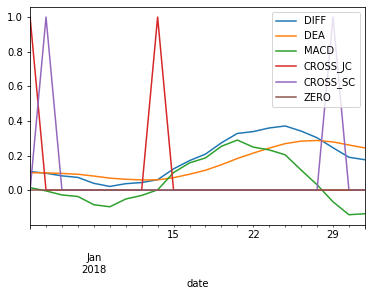

In [22]:
ind.xs(codelist[0],level=1)['2018-01'].plot()

In [23]:
ind.xs(codelist[0],level=1)['2018-01']

,DIFF,DEA,MACD,CROSS_JC,CROSS_SC,ZERO
date,,,,,,
2018-01-02,0.107795,0.100529,0.014532,1,0,0
2018-01-03,0.097765,0.099976,-0.004422,0,1,0
2018-01-04,0.082586,0.096498,-0.027823,0,0,0
2018-01-05,0.073632,0.091925,-0.036585,0,0,0
2018-01-08,0.039397,0.081419,-0.084045,0,0,0
2018-01-09,0.021437,0.069423,-0.095971,0,0,0
2018-01-10,0.037389,0.063016,-0.051255,0,0,0
2018-01-11,0.044027,0.059218,-0.030383,0,0,0
2018-01-12,0.060369,0.059448,0.001841,1,0,0


In [24]:
ind.loc['2018-01', slice(None)]

DIFF       DEA      MACD  CROSS_JC  CROSS_SC  ZERO
date       code                                                          
2018-01-02 000001  0.107795  0.100529  0.014532         1         0     0
           000002  0.374335  0.175134  0.398402         0         0     0
           000004 -0.717479 -0.746157  0.057357         0         0     0
           000005 -0.052335 -0.081922  0.059174         0         0     0
           000008  0.014692 -0.038764  0.106911         0         0     0
           000009 -0.097537 -0.124754  0.054432         0         0     0
           000010 -0.003309 -0.022565  0.038512         0         0     0
           000011 -0.191638 -0.247127  0.110976         0         0     0
           000012 -0.091374 -0.100743  0.018738         1         0     0
           000014 -0.794434 -0.854055  0.119243         0         0     0
           000016 -0.071174 -0.070218 -0.001912         0         0     0
           000017 -0.174425 -0.154140 -0.040571         0         0     0
           000020 -0.647932 -0.714398  0.132931         0         0     0
           000021  0.061610  0.034229  0.054762         0         0     0
           000023 -0.540768 -0.262083 -0.557369         0         0     0
           000025 -0.511176 -0.542830  0.063309         0         0     0
           000026  0.033131 -0.035705  0.137671         0         0     0
           000027 -0.023776 -0.035565  0.023577         0         0     0
           000028 -0.225824 -0.867528  1.283407         0         0     0
           000030 -0.017006 -0.047269  0.060526         0         0     0
           000036 -0.031442 -0.092591  0.122299         0         0     0
           000037 -0.347750 -0.348860  0.002222         1         0     0
           000038 -0.429549 -0.347732 -0.163634         0         0     0
           000039  0.547876  0.434017  0.227717         0         0     0
           000040 -0.000744 -0.127506  0.253523         0         0     0
           000042  0.140542  0.117179  0.046726         0         0     0
           000045 -0.252607 -0.220929 -0.063357         0         0     0
           000046 -0.041615 -0.050476  0.017722         0         0     0
           000048 -0.859510 -0.829781 -0.059457         0         0     0
           000049 -1.968806 -2.139483  0.341354         0         0     0
...                     ...       ...       ...       ...       ...   ...
2018-01-31 603933 -0.871619 -0.553221 -0.636796         0         0     0
           603936 -0.080026       NaN       NaN         0         0     0
           603937 -0.270814  0.109982 -0.761592         0         0     0
           603938 -1.503143 -0.945635 -1.115016         0         0     0
           603939  0.039933  0.309647 -0.539427         0         0     0
           603955 -0.945017 -0.849516 -0.191003         0         0     0
           603958 -0.039985 -0.081839  0.083709         0         0     0
           603959  0.106717  0.166733 -0.120031         0         0     0
           603960 -0.158271 -0.249490  0.182438         0         0     0
           603963 -0.187081  0.079145 -0.532451         0         0     0
           603966 -0.312151 -0.267353 -0.089597         0         0     0
           603968 -0.258549 -0.266916  0.016733         0         0     0
           603969 -0.017340  0.073217 -0.181114         0         0     0
           603970 -0.253130 -0.183607 -0.139046         0         0     0
           603976 -0.327546 -0.107398 -0.440296         0         0     0
           603977 -0.136481 -0.094814 -0.083334         0         0     0
           603978 -1.468442 -1.741517  0.546150         0         0     0
           603979  0.042868  0.057922 -0.030109         0         1     0
           603980  0.003991  0.103101 -0.198220         0         0     0
           603985 -0.193062 -0.014919 -0.356288         0         0     0
           603987 -0.069768 -0.057841 -0.023854         0         1     0
           603988 -1.321552

## SETP4:选取回测的开始和结束日期,构建回测

In [25]:
data_forbacktest = data.select_time('2018-01-01','2018-05-01')


for items in data_forbacktest.panel_gen:
    for item in items.security_gen:
        daily_ind=ind.loc[item.index]
        if daily_ind.CROSS_JC.iloc[0]>0:
            order = Account.send_order(
                code = item.code[0], 
                time = item.date[0], 
                amount = 1000, 
                towards = QA.ORDER_DIRECTION.BUY, 
                price = 0, 
                order_model = QA.ORDER_MODEL.CLOSE, 
                amount_model = QA.AMOUNT_MODEL.BY_AMOUNT
                )
            #print(item.to_json()[0])
            Broker.receive_order(QA.QA_Event(order=order,market_data=item))

            trade_mes=Broker.query_orders(Account.account_cookie,'filled')
            res=trade_mes.loc[order.account_cookie,order.realorder_id]
            order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
        elif daily_ind.CROSS_SC.iloc[0]>0:
            if Account.sell_available.get(item.code[0], 0)>0:
                order=Account.send_order(
                    code=item.code[0], 
                    time=item.date[0], 
                    amount=Account.sell_available.get(item.code[0], 0), 
                    towards=QA.ORDER_DIRECTION.SELL, 
                    price=0, 
                    order_model=QA.ORDER_MODEL.MARKET, 
                    amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                    )
                Broker.receive_order(QA.QA_Event(order=order,market_data=item))


                trade_mes=Broker.query_orders(Account.account_cookie,'filled')
                res=trade_mes.loc[order.account_cookie,order.realorder_id]
                order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
    Account.settle()

        #break

QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:000001/ Price:13.34/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:000012/ Price:6.68/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:000037/ Price:7.04/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:000050/ Price:19.72/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:000062/ Price:15.81/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:000158/ Price:7.98/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:000301/ Price:5.23/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:000404/ Price:6.25/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:000506/ Price:7.39/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:000514/ Pri

ALERT MONEY NOT ENOUGH!!!
2380.0
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:300447/ Price:19.12/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2380.0
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:300450/ Price:29.59/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2380.0
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:300451/ Price:7.88/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2380.0
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:300498/ Price:23.5/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2380.0
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:300506/ Price:11.72/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2380.0
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:300602/ Price:17.56/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2380.0
QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:300679/ Price:39.33/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2380.0
QAACCOUNT 

QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:002026/ Price:8.09/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:002031/ Price:2.74/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:002046/ Price:9.52/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:002065/ Price:8.31/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:002066/ Price:10.63/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:002086/ Price:12.39/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:002087/ Price:5.98/ TOWARDS:1/ Amounts:1000
ALERT M

QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:600231/ Price:4.67/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:600266/ Price:10.93/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:600268/ Price:5.43/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:600281/ Price:5.96/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:600285/ Price:9.22/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:600322/ Price:6.47/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:600350/ Price:5.56/ TOWARDS:1/ Amounts:1000
ALERT MO

QAACCOUNT ==> receive deal  Time 2018-01-04 00:00:00/ Code:002354/ Price:17.45/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-04 00:00:00/ Code:002363/ Price:8.68/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-04 00:00:00/ Code:002396/ Price:21.72/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-04 00:00:00/ Code:002410/ Price:20.64/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-04 00:00:00/ Code:002450/ Price:22.61/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-04 00:00:00/ Code:002503/ Price:5.29/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-04 00:00:00/ Code:002515/ Price:8.45/ TOWARDS:1/ Amounts:1000
ALERT

QAACCOUNT ==> receive deal  Time 2018-01-05 00:00:00/ Code:002102/ Price:4.87/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-05 00:00:00/ Code:002115/ Price:7.16/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-05 00:00:00/ Code:002138/ Price:16.8/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-05 00:00:00/ Code:002157/ Price:6.0/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-05 00:00:00/ Code:002210/ Price:12.91/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-05 00:00:00/ Code:002213/ Price:16.98/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-05 00:00:00/ Code:002279/ Price:10.57/ TOWARDS:1/ Amounts:1000
ALERT M

QAACCOUNT ==> receive deal  Time 2018-01-08 00:00:00/ Code:600705/ Price:5.55/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-08 00:00:00/ Code:600735/ Price:11.67/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-08 00:00:00/ Code:600741/ Price:26.07/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-08 00:00:00/ Code:600857/ Price:9.73/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-08 00:00:00/ Code:600962/ Price:10.44/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-08 00:00:00/ Code:601788/ Price:13.62/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-08 00:00:00/ Code:603168/ Price:11.43/ TOWARDS:1/ Amounts:1000
ALER

QAACCOUNT ==> receive deal  Time 2018-01-11 00:00:00/ Code:600588/ Price:12.97/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-11 00:00:00/ Code:600601/ Price:3.68/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-11 00:00:00/ Code:600776/ Price:7.63/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-11 00:00:00/ Code:600850/ Price:19.01/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-11 00:00:00/ Code:601933/ Price:10.22/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-11 00:00:00/ Code:603042/ Price:28.39/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1596.8199999999997
QAACCOUNT ==> receive deal  Time 2018-01-11 00:00:00/ Code:603083/ Price:28.92/ TOWARDS:1/ Amounts:1000
ALER

QAACCOUNT ==> receive deal  Time 2018-01-17 00:00:00/ Code:002390/ Price:8.31/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1525.2299999999977
QAACCOUNT ==> receive deal  Time 2018-01-17 00:00:00/ Code:002399/ Price:15.28/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1525.2299999999977
QAACCOUNT ==> receive deal  Time 2018-01-17 00:00:00/ Code:002418/ Price:8.71/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1525.2299999999977
QAACCOUNT ==> receive deal  Time 2018-01-17 00:00:00/ Code:002428/ Price:12.69/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1525.2299999999977
QAACCOUNT ==> receive deal  Time 2018-01-17 00:00:00/ Code:002445/ Price:7.55/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1525.2299999999977
QAACCOUNT ==> receive deal  Time 2018-01-17 00:00:00/ Code:002556/ Price:7.83/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1525.2299999999977
QAACCOUNT ==> receive deal  Time 2018-01-17 00:00:00/ Code:002630/ Price:6.85/ TOWARDS:1/ Amounts:1000
ALERT M

QAACCOUNT ==> receive deal  Time 2018-01-18 00:00:00/ Code:300328/ Price:9.94/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2101.4599999999973
QAACCOUNT ==> receive deal  Time 2018-01-18 00:00:00/ Code:300539/ Price:10.88/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2101.4599999999973
QAACCOUNT ==> receive deal  Time 2018-01-18 00:00:00/ Code:300568/ Price:26.19/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2101.4599999999973
QAACCOUNT ==> receive deal  Time 2018-01-18 00:00:00/ Code:300603/ Price:19.75/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2101.4599999999973
QAACCOUNT ==> receive deal  Time 2018-01-18 00:00:00/ Code:300622/ Price:17.21/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2101.4599999999973
QAACCOUNT ==> receive deal  Time 2018-01-18 00:00:00/ Code:300641/ Price:8.44/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2101.4599999999973
QAACCOUNT ==> receive deal  Time 2018-01-18 00:00:00/ Code:300647/ Price:10.55/ TOWARDS:1/ Amounts:1000
ALER

QAACCOUNT ==> receive deal  Time 2018-01-19 00:00:00/ Code:600523/ Price:11.61/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1195.6199999999972
QAACCOUNT ==> receive deal  Time 2018-01-19 00:00:00/ Code:600546/ Price:5.24/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1195.6199999999972
QAACCOUNT ==> receive deal  Time 2018-01-19 00:00:00/ Code:600552/ Price:7.62/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1195.6199999999972
QAACCOUNT ==> receive deal  Time 2018-01-19 00:00:00/ Code:600697/ Price:24.73/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1195.6199999999972
QAACCOUNT ==> receive deal  Time 2018-01-19 00:00:00/ Code:600730/ Price:6.66/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1195.6199999999972
QAACCOUNT ==> receive deal  Time 2018-01-19 00:00:00/ Code:600804/ Price:16.97/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1195.6199999999972
QAACCOUNT ==> receive deal  Time 2018-01-19 00:00:00/ Code:600846/ Price:9.91/ TOWARDS:1/ Amounts:1000
ALERT 

141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-22 00:00:00/ Code:300341/ Price:6.61/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-22 00:00:00/ Code:300343/ Price:7.36/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-22 00:00:00/ Code:300357/ Price:14.96/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-22 00:00:00/ Code:300380/ Price:22.56/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-22 00:00:00/ Code:300385/ Price:15.18/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-22 00:00:00/ Code:300414/ Price:11.36/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-22 00:00:00/ Code:300435/ Price:15.76/ TOWARDS:1

QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:002351/ Price:7.86/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:002387/ Price:16.35/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:002406/ Price:6.89/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:002416/ Price:7.32/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:002420/ Price:5.14/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:002425/ Price:7.46/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:002434/ Price:9.6/ TOWARDS:1/ Amounts:1000
ALERT MON

QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:601500/ Price:9.36/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:601611/ Price:10.66/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:601727/ Price:6.48/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:601801/ Price:9.94/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:603040/ Price:47.31/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:603085/ Price:20.46/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
141.21999999999753
QAACCOUNT ==> receive deal  Time 2018-01-23 00:00:00/ Code:603595/ Price:42.87/ TOWARDS:1/ Amounts:1000
ALERT

ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:002246/ Price:11.95/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:002252/ Price:19.89/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:002261/ Price:7.68/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:002265/ Price:14.2/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:002268/ Price:23.53/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:002283/ Price:5.64/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:00232

417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:300133/ Price:11.27/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:300135/ Price:3.71/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:300138/ Price:8.84/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:300142/ Price:19.49/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:300151/ Price:6.83/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:300158/ Price:7.1/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:300160/ Price:7.31/ TOWARDS:1/ Am

QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:601952/ Price:9.87/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:601991/ Price:3.95/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:601999/ Price:7.5/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:603008/ Price:19.44/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:603010/ Price:17.88/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:603019/ Price:29.22/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
417.31999999999607
QAACCOUNT ==> receive deal  Time 2018-01-24 00:00:00/ Code:603020/ Price:11.74/ TOWARDS:1/ Amounts:1000
ALERT 

462.25999999999567
QAACCOUNT ==> receive deal  Time 2018-01-25 00:00:00/ Code:002715/ Price:27.17/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
462.25999999999567
QAACCOUNT ==> receive deal  Time 2018-01-25 00:00:00/ Code:002777/ Price:24.31/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
462.25999999999567
QAACCOUNT ==> receive deal  Time 2018-01-25 00:00:00/ Code:002785/ Price:12.96/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
462.25999999999567
QAACCOUNT ==> receive deal  Time 2018-01-25 00:00:00/ Code:002824/ Price:18.11/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
462.25999999999567
QAACCOUNT ==> receive deal  Time 2018-01-25 00:00:00/ Code:002840/ Price:20.82/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
462.25999999999567
QAACCOUNT ==> receive deal  Time 2018-01-25 00:00:00/ Code:002841/ Price:43.16/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
462.25999999999567
QAACCOUNT ==> receive deal  Time 2018-01-25 00:00:00/ Code:002879/ Price:37.97/ TOWARDS

QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:000420/ Price:3.16/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
462.25999999999567
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:000507/ Price:10.28/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
462.25999999999567
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:000548/ Price:6.98/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
462.25999999999567
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:000589/ Price:4.61/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
462.25999999999567
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:000598/ Price:5.2/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:000599/ Price:6.39/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
5652.059999999996
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:000630/ Price:2.83/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ 

QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:600810/ Price:5.66/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2817.059999999996
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:600889/ Price:8.35/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2817.059999999996
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:600965/ Price:9.99/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2817.059999999996
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:601021/ Price:35.71/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2817.059999999996
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:601111/ Price:12.81/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2817.059999999996
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:601117/ Price:7.42/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2817.059999999996
QAACCOUNT ==> receive deal  Time 2018-01-26 00:00:00/ Code:601599/ Price:6.24/ TOWARDS:1/ Amounts:1000
ALERT MONEY N

8341.469999999998
QAACCOUNT ==> receive deal  Time 2018-01-30 00:00:00/ Code:002712/ Price:12.33/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
8341.469999999998
QAACCOUNT ==> receive deal  Time 2018-01-30 00:00:00/ Code:002746/ Price:8.14/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-30 00:00:00/ Code:002761/ Price:12.27/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
196.46999999999662
QAACCOUNT ==> receive deal  Time 2018-01-30 00:00:00/ Code:300019/ Price:10.22/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
196.46999999999662
QAACCOUNT ==> receive deal  Time 2018-01-30 00:00:00/ Code:300065/ Price:14.92/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
196.46999999999662
QAACCOUNT ==> receive deal  Time 2018-01-30 00:00:00/ Code:300073/ Price:23.56/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
196.46999999999662
QAACCOUNT ==> receive deal  Time 2018-01-30 00:00:00/ Code:300166/ Price:12.42/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
196.4

QAACCOUNT ==> receive deal  Time 2018-02-02 00:00:00/ Code:002273/ Price:11.97/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
507.1700000000001
QAACCOUNT ==> receive deal  Time 2018-02-02 00:00:00/ Code:002429/ Price:3.22/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-02-02 00:00:00/ Code:002456/ Price:19.1/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
3718.9500000000003
QAACCOUNT ==> receive deal  Time 2018-02-02 00:00:00/ Code:002460/ Price:38.44/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
3718.9500000000003
QAACCOUNT ==> receive deal  Time 2018-02-02 00:00:00/ Code:002475/ Price:13.41/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
3718.9500000000003
QAACCOUNT ==> receive deal  Time 2018-02-02 00:00:00/ Code:002493/ Price:10.38/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
3718.9500000000003
QAACCOUNT ==> receive deal  Time 2018-02-02 00:00:00/ Code:002601/ Price:16.14/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
3718.9500000000003
QAAC

ALERT MONEY NOT ENOUGH!!!
1745.305000000004
QAACCOUNT ==> receive deal  Time 2018-02-05 00:00:00/ Code:600569/ Price:5.45/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1745.305000000004
QAACCOUNT ==> receive deal  Time 2018-02-05 00:00:00/ Code:600582/ Price:4.89/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1745.305000000004
QAACCOUNT ==> receive deal  Time 2018-02-05 00:00:00/ Code:600593/ Price:22.79/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1745.305000000004
QAACCOUNT ==> receive deal  Time 2018-02-05 00:00:00/ Code:600661/ Price:26.07/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1745.305000000004
QAACCOUNT ==> receive deal  Time 2018-02-05 00:00:00/ Code:600919/ Price:7.7/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1745.305000000004
QAACCOUNT ==> receive deal  Time 2018-02-05 00:00:00/ Code:600966/ Price:6.39/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1745.305000000004
QAACCOUNT ==> receive deal  Time 2018-02-05 00:00:00/ Code:600997/ Price:

QAACCOUNT ==> receive deal  Time 2018-02-12 00:00:00/ Code:002591/ Price:9.19/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-12 00:00:00/ Code:002600/ Price:6.8/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-12 00:00:00/ Code:002624/ Price:30.42/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-12 00:00:00/ Code:002635/ Price:19.58/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-12 00:00:00/ Code:002644/ Price:10.7/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-12 00:00:00/ Code:002690/ Price:16.61/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-12 00:00:00/ Code:002709/ Price:29.5/ TOWARDS:1/ Amounts:1000
ALERT M

QAACCOUNT ==> receive deal  Time 2018-02-13 00:00:00/ Code:300322/ Price:8.5/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-13 00:00:00/ Code:300371/ Price:12.5/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-13 00:00:00/ Code:300378/ Price:11.63/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-13 00:00:00/ Code:300385/ Price:13.79/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-13 00:00:00/ Code:300425/ Price:4.76/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-13 00:00:00/ Code:300483/ Price:30.98/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-13 00:00:00/ Code:300503/ Price:11.78/ TOWARDS:1/ Amounts:1000
ALERT 

QAACCOUNT ==> receive deal  Time 2018-02-14 00:00:00/ Code:002734/ Price:13.53/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-14 00:00:00/ Code:002789/ Price:20.89/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-14 00:00:00/ Code:002829/ Price:24.06/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-14 00:00:00/ Code:002832/ Price:19.53/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-14 00:00:00/ Code:002859/ Price:28.04/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-14 00:00:00/ Code:002873/ Price:23.64/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1140.6250000000036
QAACCOUNT ==> receive deal  Time 2018-02-14 00:00:00/ Code:002905/ Price:21.01/ TOWARDS:1/ Amounts:1000
AL

QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:000727/ Price:2.27/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:000760/ Price:4.58/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:000782/ Price:6.3/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:000809/ Price:3.33/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:000819/ Price:8.67/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:000861/ Price:2.89/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:000903/ Price:2.98/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT 

QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002770/ Price:4.16/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002781/ Price:18.85/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002792/ Price:17.56/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002798/ Price:15.52/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002822/ Price:6.82/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002850/ Price:30.21/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:002867/ Price:17.33/ TOWARDS:1/ Amounts:1000
ALERT MONE

QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:600360/ Price:5.61/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:600370/ Price:3.02/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:600382/ Price:9.84/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:600385/ Price:10.24/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:600387/ Price:7.73/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:600405/ Price:5.72/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-22 00:00:00/ Code:600410/ Price:9.4/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT

QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:000738/ Price:12.0/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:000739/ Price:5.16/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:000759/ Price:7.88/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:000762/ Price:13.54/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:000792/ Price:12.74/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:000795/ Price:5.4/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:000797/ Price:5.8/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT

ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:002166/ Price:8.62/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:002170/ Price:5.23/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:002171/ Price:6.32/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:002179/ Price:26.7/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:002182/ Price:7.19/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:002191/ Price:7.44/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:002196/ Price:8

QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:300002/ Price:6.33/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:300015/ Price:17.78/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:300018/ Price:5.62/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:300025/ Price:4.77/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:300028/ Price:4.07/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:300035/ Price:5.97/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:300045/ Price:9.51/ TOWARDS:1/ Amounts:1000
ALERT MONEY NO

QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:600178/ Price:5.4/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:600189/ Price:5.6/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:600191/ Price:6.91/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:600192/ Price:5.23/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:600193/ Price:4.79/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:600195/ Price:9.81/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:600198/ Price:7.36/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT E

QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:601226/ Price:4.71/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:601258/ Price:1.48/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:601515/ Price:7.25/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:601567/ Price:8.73/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:601601/ Price:39.42/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:601717/ Price:5.96/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-23 00:00:00/ Code:601992/ Price:5.17/ TOWARDS:1/ Amounts:1000
ALERT MONEY NO

QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:000790/ Price:4.15/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:000799/ Price:21.4/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:000801/ Price:5.71/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:000802/ Price:11.54/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:000811/ Price:7.12/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:000813/ Price:8.23/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:000822/ Price:8.13/ TOWARDS:1/ Amounts:1000
ALERT MONEY NO

QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002296/ Price:6.41/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002298/ Price:7.68/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002300/ Price:6.54/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002305/ Price:3.8/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002315/ Price:13.37/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002317/ Price:10.13/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002320/ Price:8.02/ TOWARDS:1/ Amounts:1000
ALERT MONEY NO

QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002805/ Price:15.63/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002808/ Price:7.45/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002811/ Price:15.81/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002816/ Price:15.74/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002821/ Price:53.68/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002823/ Price:13.51/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:002825/ Price:14.91/ TOWARDS:1/ Amounts:1000
ALERT MON

QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300330/ Price:8.95/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300331/ Price:14.95/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300333/ Price:7.21/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300334/ Price:10.88/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300342/ Price:13.32/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300348/ Price:12.02/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300349/ Price:18.99/ TOWARDS:1/ Amounts:1000
ALERT MONE

QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300665/ Price:14.19/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300667/ Price:22.37/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300670/ Price:6.96/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300672/ Price:28.21/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300673/ Price:22.99/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300675/ Price:31.89/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:300678/ Price:26.29/ TOWARDS:1/ Amounts:1000
ALERT MON

QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600373/ Price:14.91/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600379/ Price:5.69/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600389/ Price:17.6/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600391/ Price:15.62/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600392/ Price:12.05/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600397/ Price:2.97/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600403/ Price:4.29/ TOWARDS:1/ Amounts:1000
ALERT MONEY 

QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600839/ Price:3.08/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600846/ Price:8.4/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600848/ Price:23.33/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600854/ Price:4.63/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600862/ Price:8.05/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600868/ Price:4.59/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:600874/ Price:11.8/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT

QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:603311/ Price:14.17/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:603316/ Price:11.93/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:603319/ Price:21.58/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:603320/ Price:20.97/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:603326/ Price:11.78/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:603331/ Price:16.46/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-26 00:00:00/ Code:603335/ Price:5.61/ TOWARDS:1/ Amounts:1000
ALERT MON

QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:000409/ Price:5.54/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:000410/ Price:9.55/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:000416/ Price:5.25/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:000421/ Price:5.21/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:000422/ Price:3.11/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:000428/ Price:3.68/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:000502/ Price:8.91/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT

QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:002612/ Price:10.89/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:002633/ Price:9.23/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:002634/ Price:5.62/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:002646/ Price:12.47/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:002648/ Price:16.42/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:002657/ Price:19.1/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:002683/ Price:6.66/ TOWARDS:1/ Amounts:1000
ALERT MONEY 

QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:300577/ Price:33.69/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:300599/ Price:10.46/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:300600/ Price:12.95/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:300635/ Price:15.65/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:300643/ Price:10.61/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:300662/ Price:20.59/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:300663/ Price:11.72/ TOWARDS:1/ Amounts:1000
ALERT MO

QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:600780/ Price:4.21/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:600781/ Price:17.57/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:600792/ Price:3.8/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:600793/ Price:22.34/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:600820/ Price:7.18/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:600824/ Price:4.23/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-27 00:00:00/ Code:600825/ Price:5.34/ TOWARDS:1/ Amounts:1000
ALERT MONEY NO

QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:000026/ Price:9.8/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:000027/ Price:5.51/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:000039/ Price:14.57/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:000042/ Price:15.18/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:000048/ Price:24.98/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:000055/ Price:8.09/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:000061/ Price:6.49/ TOWARDS:1/ Amounts:1000
ALERT MONEY N

QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:600369/ Price:4.42/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:600428/ Price:5.24/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:600500/ Price:5.67/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:600528/ Price:10.88/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:600532/ Price:9.08/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:600551/ Price:11.33/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-02-28 00:00:00/ Code:600569/ Price:5.09/ TOWARDS:1/ Amounts:1000
ALERT MONEY N

QAACCOUNT ==> receive deal  Time 2018-03-01 00:00:00/ Code:600230/ Price:31.13/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-03-01 00:00:00/ Code:600381/ Price:10.11/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-03-01 00:00:00/ Code:600456/ Price:18.8/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-03-01 00:00:00/ Code:600598/ Price:10.09/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-03-01 00:00:00/ Code:600621/ Price:12.03/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-03-01 00:00:00/ Code:600729/ Price:24.32/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
414.3350000000037
QAACCOUNT ==> receive deal  Time 2018-03-01 00:00:00/ Code:600743/ Price:3.36/ TOWARDS:1/ Amounts:1000
ALERT MONE

QAACCOUNT ==> receive deal  Time 2018-03-05 00:00:00/ Code:603157/ Price:15.6/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1187.0850000000037
QAACCOUNT ==> receive deal  Time 2018-03-05 00:00:00/ Code:603260/ Price:40.16/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1187.0850000000037
QAACCOUNT ==> receive deal  Time 2018-03-05 00:00:00/ Code:603363/ Price:17.22/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1187.0850000000037
QAACCOUNT ==> receive deal  Time 2018-03-05 00:00:00/ Code:603477/ Price:11.92/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1187.0850000000037
QAACCOUNT ==> receive deal  Time 2018-03-05 00:00:00/ Code:603676/ Price:15.39/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1187.0850000000037
QAACCOUNT ==> receive deal  Time 2018-03-05 00:00:00/ Code:603708/ Price:16.01/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1187.0850000000037
QAACCOUNT ==> receive deal  Time 2018-03-06 00:00:00/ Code:000016/ Price:5.82/ TOWARDS:1/ Amounts:1000
ALER

QAACCOUNT ==> receive deal  Time 2018-03-07 00:00:00/ Code:601788/ Price:12.7/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1187.0850000000037
QAACCOUNT ==> receive deal  Time 2018-03-07 00:00:00/ Code:601877/ Price:22.29/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1187.0850000000037
QAACCOUNT ==> receive deal  Time 2018-03-07 00:00:00/ Code:601919/ Price:6.09/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1187.0850000000037
QAACCOUNT ==> receive deal  Time 2018-03-07 00:00:00/ Code:603077/ Price:2.1/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1187.0850000000037
QAACCOUNT ==> receive deal  Time 2018-03-07 00:00:00/ Code:603456/ Price:9.6/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1187.0850000000037
QAACCOUNT ==> receive deal  Time 2018-03-07 00:00:00/ Code:603499/ Price:19.39/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1187.0850000000037
QAACCOUNT ==> receive deal  Time 2018-03-07 00:00:00/ Code:603598/ Price:16.25/ TOWARDS:1/ Amounts:1000
ALERT MO

QAACCOUNT ==> receive deal  Time 2018-03-12 00:00:00/ Code:600202/ Price:8.07/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
256.0600000000013
QAACCOUNT ==> receive deal  Time 2018-03-12 00:00:00/ Code:600229/ Price:8.36/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
256.0600000000013
QAACCOUNT ==> receive deal  Time 2018-03-12 00:00:00/ Code:600409/ Price:9.19/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
256.0600000000013
QAACCOUNT ==> receive deal  Time 2018-03-12 00:00:00/ Code:600546/ Price:4.76/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
256.0600000000013
QAACCOUNT ==> receive deal  Time 2018-03-12 00:00:00/ Code:600694/ Price:34.85/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
256.0600000000013
QAACCOUNT ==> receive deal  Time 2018-03-12 00:00:00/ Code:600731/ Price:7.49/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
256.0600000000013
QAACCOUNT ==> receive deal  Time 2018-03-12 00:00:00/ Code:600754/ Price:36.94/ TOWARDS:1/ Amounts:1000
ALERT MONEY N

ALERT MONEY NOT ENOUGH!!!
1275.442499999994
QAACCOUNT ==> receive deal  Time 2018-03-20 00:00:00/ Code:300473/ Price:40.58/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1275.442499999994
QAACCOUNT ==> receive deal  Time 2018-03-20 00:00:00/ Code:300503/ Price:14.11/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1275.442499999994
QAACCOUNT ==> receive deal  Time 2018-03-20 00:00:00/ Code:600088/ Price:11.03/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1275.442499999994
QAACCOUNT ==> receive deal  Time 2018-03-20 00:00:00/ Code:600479/ Price:12.41/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1275.442499999994
QAACCOUNT ==> receive deal  Time 2018-03-20 00:00:00/ Code:600506/ Price:15.36/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1275.442499999994
QAACCOUNT ==> receive deal  Time 2018-03-20 00:00:00/ Code:600511/ Price:29.69/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1275.442499999994
QAACCOUNT ==> receive deal  Time 2018-03-20 00:00:00/ Code:600785/ P

QAACCOUNT ==> receive deal  Time 2018-03-26 00:00:00/ Code:002223/ Price:22.86/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
4042.5999999999913
QAACCOUNT ==> receive deal  Time 2018-03-26 00:00:00/ Code:002254/ Price:12.12/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
4042.5999999999913
QAACCOUNT ==> receive deal  Time 2018-03-26 00:00:00/ Code:002255/ Price:6.58/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
4042.5999999999913
QAACCOUNT ==> receive deal  Time 2018-03-26 00:00:00/ Code:002538/ Price:7.87/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
4042.5999999999913
QAACCOUNT ==> receive deal  Time 2018-03-26 00:00:00/ Code:002608/ Price:8.52/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-26 00:00:00/ Code:002701/ Price:5.55/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-26 00:00:00/ Code:300012/ Price:4.62/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-26 00:00:00/ Code:300316/ Price:16.36/ TOWARDS:1/ Amoun

QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:300460/ Price:11.63/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
149.27999999999156
QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:300489/ Price:16.62/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
149.27999999999156
QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:300498/ Price:20.34/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
149.27999999999156
QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:300548/ Price:44.14/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
149.27999999999156
QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:300552/ Price:25.11/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
149.27999999999156
QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:300553/ Price:35.86/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
149.27999999999156
QAACCOUNT ==> receive deal  Time 2018-03-27 00:00:00/ Code:300555/ Price:10.86/ TOWARDS:1/ Amounts:1000
AL

QAACCOUNT ==> receive deal  Time 2018-03-28 00:00:00/ Code:002747/ Price:11.0/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
149.27999999999156
QAACCOUNT ==> receive deal  Time 2018-03-28 00:00:00/ Code:002779/ Price:17.92/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
149.27999999999156
QAACCOUNT ==> receive deal  Time 2018-03-28 00:00:00/ Code:002806/ Price:18.24/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
149.27999999999156
QAACCOUNT ==> receive deal  Time 2018-03-28 00:00:00/ Code:002869/ Price:30.04/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
149.27999999999156
QAACCOUNT ==> receive deal  Time 2018-03-28 00:00:00/ Code:002872/ Price:20.44/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
149.27999999999156
QAACCOUNT ==> receive deal  Time 2018-03-28 00:00:00/ Code:002881/ Price:19.21/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
149.27999999999156
QAACCOUNT ==> receive deal  Time 2018-03-28 00:00:00/ Code:002887/ Price:27.07/ TOWARDS:1/ Amounts:1000
ALE

QAACCOUNT ==> receive deal  Time 2018-03-28 00:00:00/ Code:603987/ Price:8.0/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2866.589999999991
QAACCOUNT ==> receive deal  Time 2018-03-28 00:00:00/ Code:603989/ Price:28.62/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2866.589999999991
QAACCOUNT ==> receive deal  Time 2018-03-29 00:00:00/ Code:000002/ Price:31.61/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2866.589999999991
QAACCOUNT ==> receive deal  Time 2018-03-29 00:00:00/ Code:000007/ Price:14.37/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2866.589999999991
QAACCOUNT ==> receive deal  Time 2018-03-29 00:00:00/ Code:000011/ Price:15.51/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2866.589999999991
QAACCOUNT ==> receive deal  Time 2018-03-29 00:00:00/ Code:000042/ Price:14.92/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2866.589999999991
QAACCOUNT ==> receive deal  Time 2018-03-29 00:00:00/ Code:000078/ Price:6.06/ TOWARDS:1/ Amounts:1000
ALERT MONEY

QAACCOUNT ==> receive deal  Time 2018-03-29 00:00:00/ Code:300447/ Price:16.65/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
3135.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-29 00:00:00/ Code:300484/ Price:18.99/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
3135.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-29 00:00:00/ Code:300487/ Price:33.59/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
3135.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-29 00:00:00/ Code:300493/ Price:8.25/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
3135.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-29 00:00:00/ Code:300496/ Price:32.67/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
3135.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-29 00:00:00/ Code:300499/ Price:11.67/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
3135.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-29 00:00:00/ Code:300510/ Price:8.79/ TOWARDS:1/ Amounts:1000
ALER

QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:000338/ Price:7.58/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:000408/ Price:16.7/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:000411/ Price:23.45/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:000421/ Price:5.22/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:000521/ Price:4.21/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:000541/ Price:7.36/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:000553/ Price:14.03/ TOWARDS:1/ Amounts:1000
ALERT M

QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:002884/ Price:16.82/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:002885/ Price:15.53/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:002889/ Price:26.83/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:002895/ Price:23.1/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:002897/ Price:24.01/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:002903/ Price:29.59/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:300003/ Price:33.35/ TOWARDS:1/ Amounts:1000
ALE

QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:300635/ Price:16.86/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:300655/ Price:18.28/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:300660/ Price:23.03/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:300663/ Price:13.62/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:300678/ Price:33.96/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:300681/ Price:52.66/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1740.7299999999914
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:300684/ Price:21.73/ TOWARDS:1/ Amounts:1000
AL

QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:603258/ Price:28.42/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:603277/ Price:14.38/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:603283/ Price:31.02/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:603298/ Price:14.1/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:603311/ Price:13.88/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:603316/ Price:12.33/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-03-30 00:00:00/ Code:603319/ Price:22.43/ TOWARDS:1/ Amounts:1000
ALERT MON

QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:002245/ Price:9.32/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:002270/ Price:6.26/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:002272/ Price:5.08/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:002279/ Price:13.49/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:002289/ Price:9.34/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:002290/ Price:11.38/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:002296/ Price:6.9/ TOWARDS:1/ Amounts:1000
ALERT MONEY NO

QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:300428/ Price:14.65/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:300437/ Price:15.76/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:300465/ Price:11.13/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:300466/ Price:10.7/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:300467/ Price:44.16/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:300486/ Price:19.89/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2096.999999999992
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:300488/ Price:19.08/ TOWARDS:1/ Amounts:1000
ALERT MON

QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:603106/ Price:16.07/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
301.9999999999918
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:603157/ Price:15.69/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
301.9999999999918
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:603159/ Price:16.24/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
301.9999999999918
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:603160/ Price:94.66/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
301.9999999999918
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:603166/ Price:7.36/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
301.9999999999918
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:603198/ Price:14.27/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
301.9999999999918
QAACCOUNT ==> receive deal  Time 2018-04-02 00:00:00/ Code:603303/ Price:9.89/ TOWARDS:1/ Amounts:1000
ALERT MONE

QAACCOUNT ==> receive deal  Time 2018-04-03 00:00:00/ Code:600048/ Price:12.62/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
511.3099999999922
QAACCOUNT ==> receive deal  Time 2018-04-03 00:00:00/ Code:600059/ Price:8.25/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
511.3099999999922
QAACCOUNT ==> receive deal  Time 2018-04-03 00:00:00/ Code:600186/ Price:1.77/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-03 00:00:00/ Code:600232/ Price:6.38/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
2274.5399999999922
QAACCOUNT ==> receive deal  Time 2018-04-03 00:00:00/ Code:600303/ Price:7.34/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-03 00:00:00/ Code:600323/ Price:13.88/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
9602.199999999992
QAACCOUNT ==> receive deal  Time 2018-04-03 00:00:00/ Code:600333/ Price:5.79/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-03 00:00:00/ Code:600345/ Price:28.52/ TOWARDS:1/ Amounts

QAACCOUNT ==> receive deal  Time 2018-04-04 00:00:00/ Code:300393/ Price:22.68/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
386.15999999999076
QAACCOUNT ==> receive deal  Time 2018-04-04 00:00:00/ Code:300473/ Price:39.41/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
386.15999999999076
QAACCOUNT ==> receive deal  Time 2018-04-04 00:00:00/ Code:600017/ Price:3.66/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
386.15999999999076
QAACCOUNT ==> receive deal  Time 2018-04-04 00:00:00/ Code:600018/ Price:7.0/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
386.15999999999076
QAACCOUNT ==> receive deal  Time 2018-04-04 00:00:00/ Code:600026/ Price:5.31/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
386.15999999999076
QAACCOUNT ==> receive deal  Time 2018-04-04 00:00:00/ Code:600057/ Price:5.21/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
386.15999999999076
QAACCOUNT ==> receive deal  Time 2018-04-04 00:00:00/ Code:600127/ Price:4.29/ TOWARDS:1/ Amounts:1000
ALERT MO

QAACCOUNT ==> receive deal  Time 2018-04-09 00:00:00/ Code:600247/ Price:7.83/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
366.2399999999907
QAACCOUNT ==> receive deal  Time 2018-04-09 00:00:00/ Code:600259/ Price:34.96/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
366.2399999999907
QAACCOUNT ==> receive deal  Time 2018-04-09 00:00:00/ Code:600281/ Price:4.81/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-09 00:00:00/ Code:600298/ Price:32.42/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
5166.42999999999
QAACCOUNT ==> receive deal  Time 2018-04-09 00:00:00/ Code:600375/ Price:5.14/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-09 00:00:00/ Code:600537/ Price:4.19/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
21.429999999990287
QAACCOUNT ==> receive deal  Time 2018-04-09 00:00:00/ Code:600592/ Price:8.37/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
21.429999999990287
QAACCOUNT ==> receive deal  Time 2018-04-09 00:00:00/ C

QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:002797/ Price:8.05/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
404.48999999998887
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:002832/ Price:19.23/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
404.48999999998887
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:002919/ Price:26.83/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
404.48999999998887
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:300040/ Price:7.66/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
404.48999999998887
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:300072/ Price:24.38/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
404.48999999998887
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:300081/ Price:12.35/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
404.48999999998887
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:300127/ Price:15.46/ TOWARDS:1/ Amounts:1000
ALER

QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:603113/ Price:18.32/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
404.48999999998887
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:603323/ Price:6.9/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
404.48999999998887
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:603377/ Price:26.57/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
404.48999999998887
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:603385/ Price:12.81/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
404.48999999998887
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:603506/ Price:23.12/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
404.48999999998887
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:603558/ Price:9.62/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
404.48999999998887
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:603566/ Price:20.4/ TOWARDS:1/ Amounts:1000
ALERT 

QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:300715/ Price:24.45/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
81.98999999998887
QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:600000/ Price:11.43/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
81.98999999998887
QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:600006/ Price:4.82/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
81.98999999998887
QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:600007/ Price:13.76/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
81.98999999998887
QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:600021/ Price:8.22/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
81.98999999998887
QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:600029/ Price:10.31/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
81.98999999998887
QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:600035/ Price:3.93/ TOWARDS:1/ Amounts:1000
ALERT MONEY

QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:603300/ Price:5.45/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
81.98999999998887
QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:603339/ Price:21.56/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
81.98999999998887
QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:603345/ Price:27.17/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
81.98999999998887
QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:603355/ Price:29.03/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
81.98999999998887
QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:603365/ Price:23.97/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
81.98999999998887
QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:603533/ Price:52.56/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
81.98999999998887
QAACCOUNT ==> receive deal  Time 2018-04-11 00:00:00/ Code:603599/ Price:15.11/ TOWARDS:1/ Amounts:1000
ALERT MON

QAACCOUNT ==> receive deal  Time 2018-04-12 00:00:00/ Code:600881/ Price:4.66/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
536.8899999999885
QAACCOUNT ==> receive deal  Time 2018-04-12 00:00:00/ Code:600892/ Price:9.45/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
536.8899999999885
QAACCOUNT ==> receive deal  Time 2018-04-12 00:00:00/ Code:601811/ Price:11.98/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
536.8899999999885
QAACCOUNT ==> receive deal  Time 2018-04-12 00:00:00/ Code:601899/ Price:4.24/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
536.8899999999885
QAACCOUNT ==> receive deal  Time 2018-04-12 00:00:00/ Code:601929/ Price:2.73/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
536.8899999999885
QAACCOUNT ==> receive deal  Time 2018-04-12 00:00:00/ Code:601988/ Price:3.55/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
536.8899999999885
QAACCOUNT ==> receive deal  Time 2018-04-12 00:00:00/ Code:603003/ Price:11.93/ TOWARDS:1/ Amounts:1000
ALERT MONEY N

ALERT MONEY NOT ENOUGH!!!
1609.619999999988
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:601098/ Price:11.39/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1609.619999999988
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:601318/ Price:63.05/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1609.619999999988
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:601588/ Price:3.92/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1609.619999999988
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:601678/ Price:6.78/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1609.619999999988
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:601918/ Price:3.14/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1609.619999999988
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:603000/ Price:11.28/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1609.619999999988
QAACCOUNT ==> receive deal  Time 2018-04-13 00:00:00/ Code:603012/ Pric

QAACCOUNT ==> receive deal  Time 2018-04-18 00:00:00/ Code:000089/ Price:7.82/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
783.7524999999923
QAACCOUNT ==> receive deal  Time 2018-04-18 00:00:00/ Code:000528/ Price:6.67/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
783.7524999999923
QAACCOUNT ==> receive deal  Time 2018-04-18 00:00:00/ Code:000561/ Price:7.9/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
783.7524999999923
QAACCOUNT ==> receive deal  Time 2018-04-18 00:00:00/ Code:000709/ Price:3.12/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
783.7524999999923
QAACCOUNT ==> receive deal  Time 2018-04-18 00:00:00/ Code:000720/ Price:4.3/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
783.7524999999923
QAACCOUNT ==> receive deal  Time 2018-04-18 00:00:00/ Code:000733/ Price:13.81/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
783.7524999999923
QAACCOUNT ==> receive deal  Time 2018-04-18 00:00:00/ Code:000850/ Price:4.1/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> re

QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:000908/ Price:5.82/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:000928/ Price:4.95/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:000933/ Price:7.86/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1105.8349999999928
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:000957/ Price:9.11/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1105.8349999999928
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:002036/ Price:12.95/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1105.8349999999928
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:002049/ Price:54.25/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1105.8349999999928
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:002050/ Price:12.95/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1105.8349999999928
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:

QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:601518/ Price:3.27/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
107.89499999999134
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:601618/ Price:3.63/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
107.89499999999134
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:601669/ Price:6.22/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
107.89499999999134
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:601808/ Price:11.6/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
107.89499999999134
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:601818/ Price:3.66/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
107.89499999999134
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:601880/ Price:2.46/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
107.89499999999134
QAACCOUNT ==> receive deal  Time 2018-04-19 00:00:00/ Code:601908/ Price:4.73/ TOWARDS:1/ Amounts:1000
ALERT MON

QAACCOUNT ==> receive deal  Time 2018-04-23 00:00:00/ Code:601628/ Price:23.98/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1786.3049999999885
QAACCOUNT ==> receive deal  Time 2018-04-23 00:00:00/ Code:601811/ Price:11.79/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-23 00:00:00/ Code:601818/ Price:3.64/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-23 00:00:00/ Code:603333/ Price:5.87/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-23 00:00:00/ Code:603378/ Price:20.82/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
15773.644999999988
QAACCOUNT ==> receive deal  Time 2018-04-23 00:00:00/ Code:603616/ Price:17.64/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
15773.644999999988
QAACCOUNT ==> receive deal  Time 2018-04-23 00:00:00/ Code:603618/ Price:7.18/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-23 00:00:00/ Code:603929/ Price:26.63/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
8588.644

1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-24 00:00:00/ Code:600155/ Price:9.2/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-24 00:00:00/ Code:600175/ Price:4.24/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-24 00:00:00/ Code:600247/ Price:7.65/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-24 00:00:00/ Code:600275/ Price:4.62/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-24 00:00:00/ Code:600277/ Price:5.27/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-24 00:00:00/ Code:600279/ Price:5.89/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-24 00:00:00/ Code:600288/ Price:8.97/ TOWARDS:1/ Amou

QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:002078/ Price:10.48/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:002123/ Price:11.01/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:002133/ Price:4.39/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:002154/ Price:2.93/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:002164/ Price:7.54/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:002174/ Price:21.59/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:002197/ Price:10.29/ TOWARDS:1/ Amounts:1000
ALERT

QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:600258/ Price:23.2/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:600326/ Price:8.35/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:600328/ Price:8.7/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:600353/ Price:5.89/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:600382/ Price:8.93/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:600436/ Price:89.17/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-25 00:00:00/ Code:600476/ Price:15.65/ TOWARDS:1/ Amounts:1000
ALERT MO

QAACCOUNT ==> receive deal  Time 2018-04-26 00:00:00/ Code:002555/ Price:13.86/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-26 00:00:00/ Code:002577/ Price:16.21/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-26 00:00:00/ Code:002609/ Price:12.91/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-26 00:00:00/ Code:002614/ Price:22.15/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-26 00:00:00/ Code:002623/ Price:19.02/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-26 00:00:00/ Code:002645/ Price:9.27/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
1883.6449999999877
QAACCOUNT ==> receive deal  Time 2018-04-26 00:00:00/ Code:002657/ Price:20.78/ TOWARDS:1/ Amounts:1000
ALE

QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:300345/ Price:4.78/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
231.66499999998814
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:300363/ Price:13.46/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
231.66499999998814
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:300370/ Price:4.11/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
231.66499999998814
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:300414/ Price:11.81/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
231.66499999998814
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:300485/ Price:16.89/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
231.66499999998814
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:300506/ Price:10.75/ TOWARDS:1/ Amounts:1000
ALERT MONEY NOT ENOUGH!!!
231.66499999998814
QAACCOUNT ==> receive deal  Time 2018-04-27 00:00:00/ Code:300515/ Price:11.25/ TOWARDS:1/ Amounts:1000
ALER

# STEP5: 分析账户

In [26]:
Account.history

[['2018-01-02 00:00:00',
  '000001',
  13.34,
  1000,
  186655.0,
  'Order_BtWzexym',
  'Order_BtWzexym',
  'Trade_yB89Rz50',
  'JCSC_EXAMPLE',
  5,
  0,
  None,
  0,
  1,
  0],
 ['2018-01-02 00:00:00',
  '000012',
  6.68,
  1000,
  179970.0,
  'Order_4TelIy2R',
  'Order_4TelIy2R',
  'Trade_d8JLyBQx',
  'JCSC_EXAMPLE',
  5,
  0,
  None,
  0,
  1,
  0],
 ['2018-01-02 00:00:00',
  '000037',
  7.04,
  1000,
  172925.0,
  'Order_UypINn4E',
  'Order_UypINn4E',
  'Trade_gB4wkFIo',
  'JCSC_EXAMPLE',
  5,
  0,
  None,
  0,
  1,
  0],
 ['2018-01-02 00:00:00',
  '000050',
  19.72,
  1000,
  153200.0,
  'Order_Zd21DCVw',
  'Order_Zd21DCVw',
  'Trade_kH2nThtv',
  'JCSC_EXAMPLE',
  5,
  0,
  None,
  0,
  1,
  0],
 ['2018-01-02 00:00:00',
  '000062',
  15.81,
  1000,
  137385.0,
  'Order_FuBgZC4i',
  'Order_FuBgZC4i',
  'Trade_sSuInQa7',
  'JCSC_EXAMPLE',
  5,
  0,
  None,
  0,
  1,
  0],
 ['2018-01-02 00:00:00',
  '000158',
  7.98,
  1000,
  129400.0,
  'Order_XD1zMBeE',
  'Order_XD1zMBeE',
  'Trad

In [27]:
Account.history_table

,datetime,code,price,amount,cash,order_id,realorder_id,trade_id,account_cookie,commission,tax,message,frozen,direction,total_frozen
0,2018-01-02 00:00:00,000001,13.34,1000,186655.000,Order_BtWzexym,Order_BtWzexym,Trade_yB89Rz50,JCSC_EXAMPLE,5.0,0.00,None,0,1,0
1,2018-01-02 00:00:00,000012,6.68,1000,179970.000,Order_4TelIy2R,Order_4TelIy2R,Trade_d8JLyBQx,JCSC_EXAMPLE,5.0,0.00,None,0,1,0
2,2018-01-02 00:00:00,000037,7.04,1000,172925.000,Order_UypINn4E,Order_UypINn4E,Trade_gB4wkFIo,JCSC_EXAMPLE,5.0,0.00,None,0,1,0
3,2018-01-02 00:00:00,000050,19.72,1000,153200.000,Order_Zd21DCVw,Order_Zd21DCVw,Trade_kH2nThtv,JCSC_EXAMPLE,5.0,0.00,None,0,1,0
4,2018-01-02 00:00:00,000062,15.81,1000,137385.000,Order_FuBgZC4i,Order_FuBgZC4i,Trade_sSuInQa7,JCSC_EXAMPLE,5.0,0.00,None,0,1,0
5,2018-01-02 00:00:00,000158,7.98,1000,129400.000,Order_XD1zMBeE,Order_XD1zMBeE,Trade_mRaA5lCP,JCSC_EXAMPLE,5.0,0.00,None,0,1,0
6,2018-01-02 00:00:00,000301,5.23,1000,124165.000,Order_hUyI9E3w,Order_hUyI9E3w,Trade_qCJu8KkR,JCSC_EXAMPLE,5.0,0.00,None,0,1,0
7,2018-01-02 00:00:00,000404,6.25,1000,117910.000,Order_W9qKrThL,Order_W9qKrThL,Trade_Y0XIqdc4,JCSC_EXAMPLE,5.0,0.00,None,0,1,0
8,2018-01-02 00:00:00,000506,7.39,1000,110515.000,Order_AfGUWl8p,Order_AfGUWl8p,Trade_BT4eRlqP,JCSC_EXAMPLE,5.0,0.00,None,0,1,0
9,2018-01-02 00:00:00,000514,6.40,1000,104110.000,Order_cPCIdxSt,Order_cPCIdxSt,Trade_Ymul12gL,JCSC_EXAMPLE,5.0,0.00,None,0,1,0


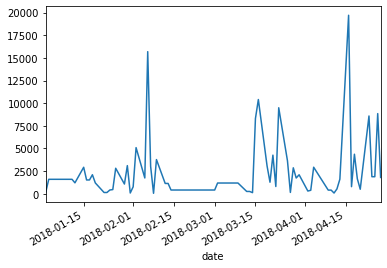

In [28]:
Account.daily_cash.cash.plot()

In [29]:
Account.daily_hold

,000001,000005,000012,000016,000037,000050,000058,000062,000078,000158,...,601811,601818,601952,603010,603067,603088,603110,603333,603363,603618
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,1000.0,0.0,1000.0,0.0,1000.0,1000.0,0.0,1000.0,0.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,0.0,0.0,1000.0,1000.0,1000.0,1000.0,0.0,1000.0,1000.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-04,0.0,0.0,1000.0,1000.0,1000.0,1000.0,0.0,1000.0,1000.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-05,0.0,0.0,1000.0,1000.0,1000.0,1000.0,0.0,1000.0,1000.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-08,0.0,0.0,1000.0,1000.0,1000.0,1000.0,0.0,1000.0,1000.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-09,0.0,0.0,1000.0,1000.0,1000.0,1000.0,0.0,1000.0,1000.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-10,0.0,0.0,1000.0,1000.0,1000.0,1000.0,0.0,1000.0,1000.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-11,0.0,0.0,1000.0,1000.0,1000.0,1000.0,0.0,1000.0,1000.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-12,0.0,0.0,1000.0,1000.0,1000.0,1000.0,0.0,1000.0,1000.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
Risk=QA.QA_Risk(Account)

NameError: name 'QA' is not defined

In [2]:
Risk.message

NameError: name 'Risk' is not defined

In [3]:
Risk.market_value.diff().iloc[-1]

NameError: name 'Risk' is not defined

In [4]:
Risk.account.cash_table

NameError: name 'Risk' is not defined